In [1]:
from rfms.readers import *
from rfms.storytellers import *
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
options = dict()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

raw_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    raw_data.data, raw_data.target, train_size=0.5,
    random_state=2017)

#y_train = np.random.permutation(y_train)

rf = RandomForestClassifier(
    n_estimators=10, random_state=1231, max_depth = 20, bootstrap=True)
rf.fit(X=X_train, y=y_train)
#print(rf.estimators_[0].tree_.value[0])
reader = ForestReader()
reader.read_from(rf, X_test, TreeReaderType = 'Importance')
reader.summary()
out, feature_importances_ = individual_signed_feature_importance(reader, y_test)
print(out.head())
print(rf.feature_importances_)
print(feature_importances_)


/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here is the summary.
Number of features is 30
Number of samples is 285
Number of paths is 117
Some samples from self.info_
            f0 f1        f2        f3 f4 f5         f6         f7        f8  \
115          0  0         0  0.000000  0  0          0          0         0   
85           0  0 -0.338364  0.000000  0  0          0          0  0.277778   
30           0  0         0  0.000000  0  0          0          0         0   
104        0.6  0         0  0.000000  0  0          0          0         0   
50           0  0         0 -0.923077  0  0   0.290297          0         0   
76           0  0  0.296247  0.000000  0  0  0.0213832          0         0   
87           0  0  -0.50503  0.000000  0  0          0          0         0   
74  -0.0121835  0         0  0.000000  0  0          0 -0.0253165         0   
18           0  0         0  0.000000  0  0          0  -0.512575         0   
61           0  0         0 -0.045649  0  0  -0.502438          0         0   

    f9 

ValueError: too many values to unpack (expected 2)

In [3]:
oob_importance = oob_feature_importance(rf, X_train, y_train)
test_importance, test_SE = test_feature_importance(rf, X_test, y_test)

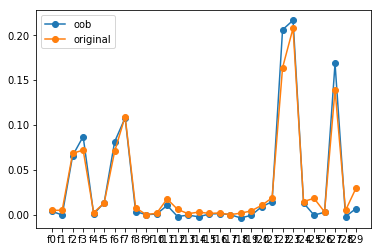

In [4]:
plt.plot(reader.feature_names_,oob_importance, marker = 'o')
plt.plot(rf.feature_importances_, marker = 'o')
plt.legend(['oob', 'original'])

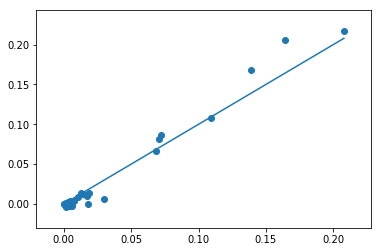

In [5]:
plt.scatter(rf.feature_importances_, oob_importance, marker = 'o')
plt.plot([0, max(rf.feature_importances_)], [0, max(rf.feature_importances_)])

<BarContainer object of 30 artists>

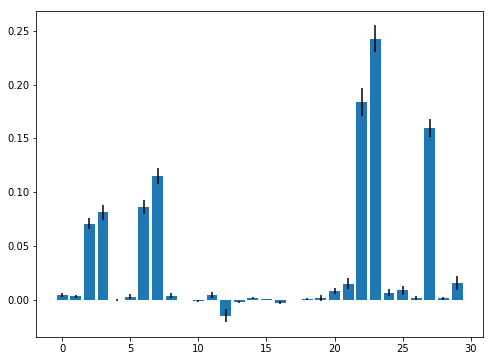

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(x = np.arange(len(test_importance)), height=test_importance, yerr = test_SE * 2)
#plt.legend(['oob', 'original'])

(0, 0.012812521105365739)

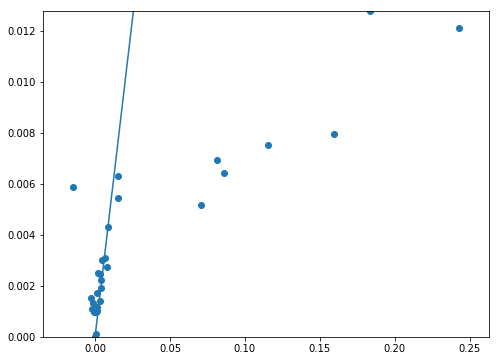

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x = test_importance, y = test_SE)
plt.plot([0, np.max(test_importance)], [0, np.max(test_importance) * .5])
plt.ylim([0, np.max(test_SE)])